# Homework Assignment 2
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [1]:
!pip install requests beautifulsoup4

In [12]:
import requests
from bs4 import BeautifulSoup

def get_hacker_news_titles_votes(url="https://news.ycombinator.com"):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    titles = [title.text for title in soup.select('title')]
    votes = [int(vote.text.split()[0]) for vote in soup.select('.score')]

    news_data = [{"title": title, "votes": votes[i] if i < len(votes) else 0}
                 for i, title in enumerate(titles)]

    return news_data

# Call the function
news = get_hacker_news_titles_votes()
for item in news:
    print(f"Title: {item['title']}, Votes: {item['votes']}")


Title: Hacker News, Votes: 340


**Question 2**:  Write a function that collects data on four Marvel movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [13]:
!pip install tmdbv3api

In [14]:
from tmdbv3api import TMDb, Movie

# Set up TMDb API connection
tmdb = TMDb()
tmdb.api_key = 'f9cc41cfe20e145d49609134f0ec6041'  # Replace with your TMDb API key

def get_marvel_movie_data():
    # Initialize the Movie object
    movie_api = Movie()

    # List of Marvel movie titles to search for
    movie_titles = ["Iron Man", "The Avengers", "Black Panther", "Spider-Man: Homecoming"]
    marvel_movies_data = []

    # Collect data for each movie
    for title in movie_titles:
        search_results = movie_api.search(title)

        # Check if there are results for the title
        if search_results:
            movie = search_results[0]  # Assume the first result is the correct movie
            movie_data = {
                "title": movie.title,
                "release_date": movie.release_date,
                "overview": movie.overview,
                "vote_average": movie.vote_average,
                "vote_count": movie.vote_count,
            }
            marvel_movies_data.append(movie_data)

    return marvel_movies_data

# Call the function and print results
movies = get_marvel_movie_data()
for movie in movies:
    print(f"Title: {movie['title']}")
    print(f"Release Date: {movie['release_date']}")
    print(f"Overview: {movie['overview']}")
    print(f"Average Vote: {movie['vote_average']}")
    print(f"Vote Count: {movie['vote_count']}\n")


Title: Iron Man
Release Date: 2008-04-30
Overview: After being held captive in an Afghan cave, billionaire engineer Tony Stark creates a unique weaponized suit of armor to fight evil.
Average Vote: 7.647
Vote Count: 26286

Title: The Avengers
Release Date: 2012-04-25
Overview: When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!
Average Vote: 7.72
Vote Count: 30684

Title: Black Panther
Release Date: 2018-02-13
Overview: King T'Challa returns home to the reclusive, technologically advanced African nation of Wakanda to serve as his country's new leader. However, T'Challa soon finds that he is challenged for the throne by factions within his own country as well as without. Using powers reserved to Wakandan kings, T'Challa assumes the Black Panther

## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

**Note:** Use ks-projects-201801.csv data

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [16]:
# which question to answer - put your ID number and run the code
your_id  = "308177971"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 3 and 4


**Question 1:** On average which project category received the lowest number of backers? (15 pt)

**Question 2:** On average which project category received the lowest pledged USD? (15 pt)

**Question 3:** In which month is there the lowest number of projects? (15 pt)

In [25]:
import pandas as pd
import gdown

names_file_id = '1twjueZb0SlCir1QTv5CIs0hqEU9I8TcS'
gdown.download(f'https://drive.google.com/uc?id={names_file_id}', 'ks-projects-201801.csv', quiet=False)

# Load the dataset
df = pd.read_csv('ks-projects-201801.csv', encoding='ISO-8859-1')

df.columns = df.columns.str.replace(' ', '')

# Convert 'launched' column to datetime and extract the month
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')
df['launch_month'] = df['launched'].dt.month

# Group by month and count the projects
project_counts = df['launch_month'].value_counts().sort_index()

# Find the month with the lowest number of projects
lowest_month = project_counts.idxmin()
lowest_count = project_counts.min()

print(f"The month with the lowest number of projects is month {lowest_month} with {lowest_count} projects.")

Downloading...
From: https://drive.google.com/uc?id=1twjueZb0SlCir1QTv5CIs0hqEU9I8TcS
To: /content/ks-projects-201801.csv
100%|██████████| 46.5M/46.5M [00:01<00:00, 39.7MB/s]
<ipython-input-25-52d92cc9ebad>:8: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ks-projects-201801.csv', encoding='ISO-8859-1')


The month with the lowest number of projects is month 12.0 with 17889 projects.


**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

<ipython-input-26-4455f9e085ce>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['launched'].dt.month
<ipython-input-26-4455f9e085ce>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues")


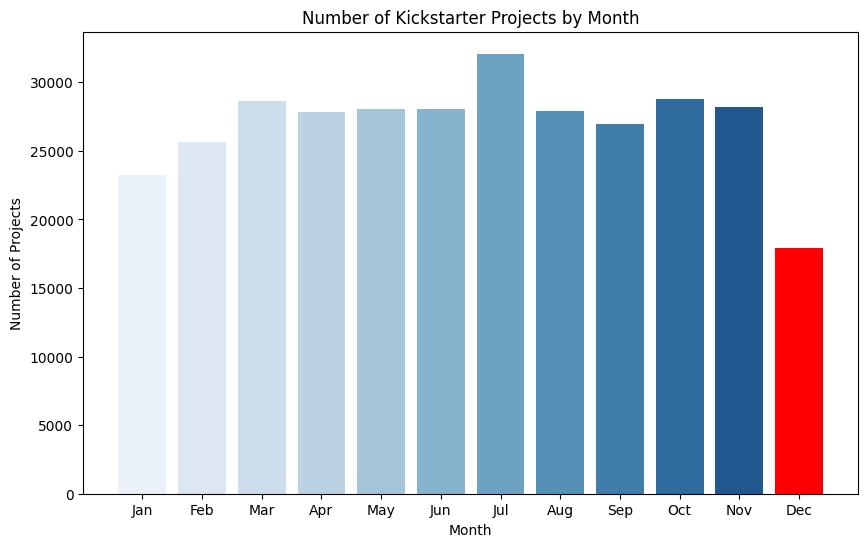

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the data
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')

# Drop rows with NaT in the 'launched' column
df = df.dropna(subset=['launched'])

# Extract the month from the 'launched' column
df['month'] = df['launched'].dt.month

# Count the number of projects in each month
month_counts = df['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette="Blues")

# Highlight the month with the lowest number of projects
min_month = month_counts.idxmin()
min_value = month_counts.min()
plt.bar(min_month-1, min_value, color='red')  # Months in barplot start at index 0

# Labels and title
plt.xlabel("Month")
plt.ylabel("Number of Projects")
plt.title("Number of Kickstarter Projects by Month")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  **Pandas**, please answer the following questions:

**Question 1:** Write code which calculate the top-20 most friendly characters, i.e., characters with the
    highest number of friends. Please use _hero_network.csv_ file (15pt).
    
**Note:** Not all the links in this dataset are symmetric.

In [30]:
import pandas as pd

import gdown

names_file_id = '1C9-z7LK7KWc5Taak1JU275zTUlYt2mY8'
gdown.download(f'https://drive.google.com/uc?id={names_file_id}', 'hero_network.csv', quiet=False)

# Load the dataset
df = pd.read_csv('hero_network.csv')

# Display the first few rows of the dataframe to inspect the data
print(df.head())
print(df.keys())

# Ensure that both directions of the friendship are counted
# We'll use the `friend1` and `friend2` columns to count each unique pair (A, B) and (B, A)
df['pair1'] = df[['hero1', 'hero2']].min(axis=1)
df['pair2'] = df[['hero1', 'hero2']].max(axis=1)

# Now, we'll count the number of connections for each hero using both 'pair1' and 'pair2'
friends_count = pd.concat([df['pair1'], df['pair2']]).value_counts()

# Get the top-20 characters with the highest number of friends
top_20_friends = friends_count.head(20)

# Display the top 20 friendly characters
print(top_20_friends)

Downloading...
From: https://drive.google.com/uc?id=1C9-z7LK7KWc5Taak1JU275zTUlYt2mY8
To: /content/hero_network.csv
100%|██████████| 22.2M/22.2M [00:00<00:00, 92.4MB/s]


                  hero1                 hero2
0         LITTLE, ABNER        PRINCESS ZANDA
1         LITTLE, ABNER  BLACK PANTHER/T'CHAL
2  BLACK PANTHER/T'CHAL        PRINCESS ZANDA
3         LITTLE, ABNER        PRINCESS ZANDA
4         LITTLE, ABNER  BLACK PANTHER/T'CHAL
Index(['hero1', 'hero2'], dtype='object')
CAPTAIN AMERICA         16499
SPIDER-MAN/PETER PAR    13717
IRON MAN/TONY STARK     11817
THOR/DR. DONALD BLAK    11427
THING/BENJAMIN J. GR    10681
WOLVERINE/LOGAN         10353
HUMAN TORCH/JOHNNY S    10237
SCARLET WITCH/WANDA      9911
MR. FANTASTIC/REED R     9775
VISION                   9696
INVISIBLE WOMAN/SUE      9326
BEAST/HENRY &HANK& P     9287
CYCLOPS/SCOTT SUMMER     9099
STORM/ORORO MUNROE S     8795
HAWK                     8483
WASP/JANET VAN DYNE      8426
COLOSSUS II/PETER RA     7863
PROFESSOR X/CHARLES      7840
HULK/DR. ROBERT BRUC     7515
ANT-MAN/DR. HENRY J.     7343
Name: count, dtype: int64


**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type according to data in the *nodes.csv* file (5pt)

Downloading...
From: https://drive.google.com/uc?id=13SlYIZOZhxKxi3sN0uoR3C-8meulYAv3
To: /content/nodes.csv
100%|██████████| 296k/296k [00:00<00:00, 4.64MB/s]


Index(['node', 'type'], dtype='object')


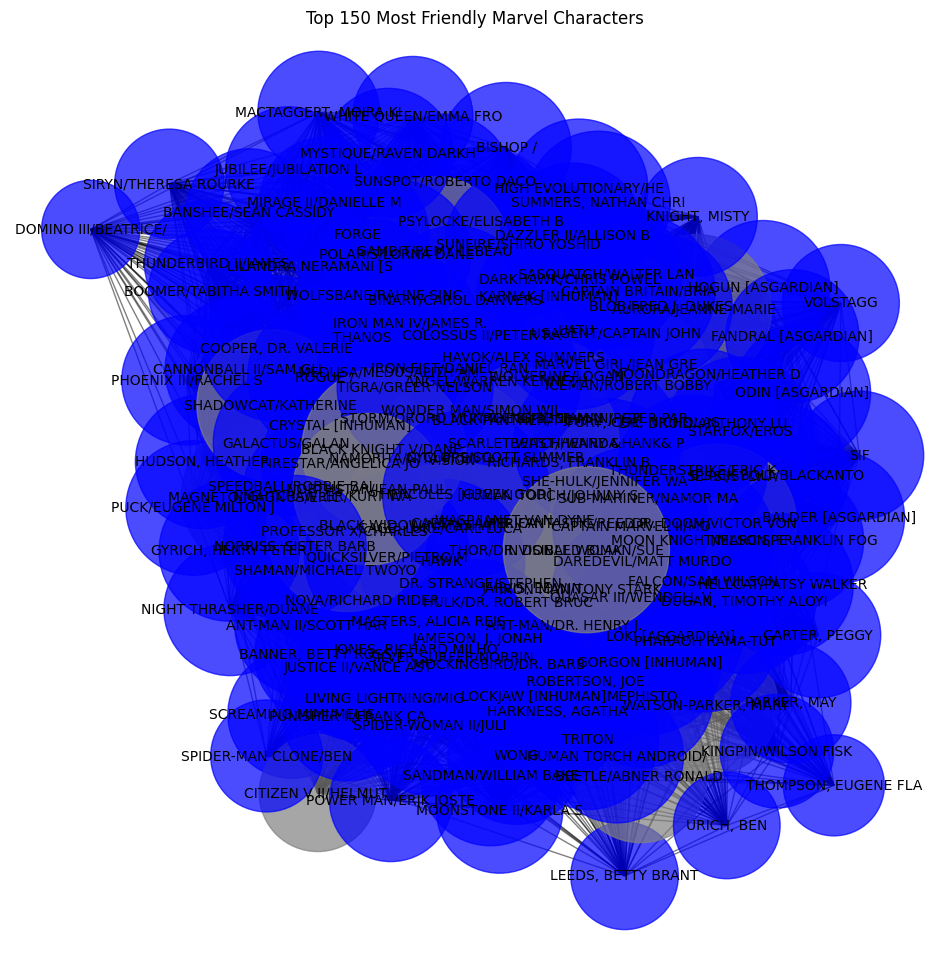

In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gdown

names_file_id = '13SlYIZOZhxKxi3sN0uoR3C-8meulYAv3'
gdown.download(f'https://drive.google.com/uc?id={names_file_id}', 'nodes.csv', quiet=False)

# Load the data
nodes_df = pd.read_csv('nodes.csv')

print(nodes_df.keys())

# Step 1: Create the graph
G = nx.Graph()

# Add edges (friendship pairs) to the graph
for index, row in df.iterrows():
    G.add_edge(row['hero1'], row['hero2'])

# Step 2: Calculate degree for each node (number of friends)
degree_dict = dict(G.degree())

# Step 3: Get the top 150 most friendly characters (highest degree)
top_150 = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:150]

# Create a subgraph with the top 150 nodes
top_150_nodes = [node for node, degree in top_150]
subgraph = G.subgraph(top_150_nodes)

# Step 4: Assign node sizes based on degree
node_sizes = [subgraph.degree(node) * 100 for node in subgraph.nodes()]

# Step 5: Merge character type data (node coloring)
# Merge the nodes' character type from nodes.csv
node_types = nodes_df.set_index('node')['type'].to_dict()
node_colors = [node_types.get(node, 'gray') for node in subgraph.nodes()]

# Map colors to a specific color palette, e.g., heroes in blue, villains in red
color_map = {'hero': 'blue', 'villain': 'red', 'neutral': 'green'}
node_colors = [color_map.get(color, 'gray') for color in node_colors]

# Step 6: Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, k=0.2)  # positions for all nodes

# Draw the nodes with size and color based on the attributes
nx.draw_networkx_nodes(subgraph, pos, node_size=node_sizes, node_color=node_colors, alpha=0.7)
nx.draw_networkx_edges(subgraph, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(subgraph, pos, font_size=10, font_color="black")

# Add title and show the plot
plt.title("Top 150 Most Friendly Marvel Characters")
plt.axis('off')  # Hide axis
plt.show()



**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) or [D3](https://d3js.org) (10pt)

In [38]:
import pandas as pd
import gdown

names_file_id = '1evVBbjEg8WNEnnV1e3UDzditlXavPfQN'
gdown.download(f'https://drive.google.com/uc?id={names_file_id}', 'edges.csv', quiet=False)

# Load the data
edges_df = pd.read_csv('edges.csv')

# Example data for nodes and edges (you can replace this with your actual data)
nodes_data = {
    'id': ['Iron Man', 'Spider-Man', 'Thanos'],
    'type': ['hero', 'hero', 'villain']
}

edges_data = {
    'source': ['Iron Man', 'Iron Man'],
    'target': ['Spider-Man', 'Thanos']
}

# Convert to DataFrame
nodes_df = pd.DataFrame(nodes_data)
edges_df = pd.DataFrame(edges_data)

# Save to CSV
nodes_df.to_csv('/content/nodes.csv', index=False)
edges_df.to_csv('/content/edges.csv', index=False)

Downloading...
From: https://drive.google.com/uc?id=1evVBbjEg8WNEnnV1e3UDzditlXavPfQN
To: /content/edges.csv
100%|██████████| 2.37M/2.37M [00:00<00:00, 18.9MB/s]


In [46]:
from google.colab import drive
drive.mount('/content/drive')

# Use the full path to your file in Google Drive
file_path = '/content/drive/MyDrive/PhD/BGU/BigData/HW2/nodes.csv'

Mounted at /content/drive


In [57]:
!cd drive/MyDrive/PhD/BGU/BigData/HW2

In [71]:
html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Marvel Universe Network</title>
    <script src="https://d3js.org/d3.v6.min.js"></script>
    <style>
        body { font: 12px sans-serif; }
        .node { stroke: #fff; stroke-width: 1.5px; }
        .link { stroke: #999; stroke-opacity: 0.6; }
    </style>
</head>
<body>
    <script>
        // Set up the width, height, and margins for the visualization
        const width = 800, height = 600;

        // Create an SVG element to hold the graph
        const svg = d3.select("body").append("svg")
            .attr("width", width)
            .attr("height", height);

        // Load the CSV files for nodes and edges
        d3.csv("./nodes.csv").then(function(nodes_data) {
            d3.csv("./edges.csv").then(function(edges_data) {

                // Convert the data to appropriate formats for D3
                const nodes = nodes_data.map(function(d) { return { id: d.node, type: d.type }; });
                const links = edges_data.map(function(d) { return { source: d.hero, target: d.comic }; });

                // Create a force simulation for the graph
                const simulation = d3.forceSimulation(nodes)
                    .force("link", d3.forceLink(links).id(function(d) { return d.node; }))
                    .force("charge", d3.forceManyBody())
                    .force("center", d3.forceCenter(width / 2, height / 2));

                // Create links (edges) between nodes
                const link = svg.append("g")
                    .selectAll(".link")
                    .data(links)
                    .enter().append("line")
                    .attr("class", "link")
                    .attr("stroke-width", 2);

                // Create nodes (characters)
                const node = svg.append("g")
                    .selectAll(".node")
                    .data(nodes)
                    .enter().append("circle")
                    .attr("class", "node")
                    .attr("r", 10)
                    .attr("fill", function(d) { return d.type === 'hero' ? 'blue' : 'red'; })
                    .call(d3.drag()
                        .on("start", dragstarted)
                        .on("drag", dragged)
                        .on("end", dragended));

                // Add node labels (names)
                node.append("title")
                    .text(function(d) { return d.id; });

                // Function to update the simulation on each tick
                simulation.on("tick", function() {
                    link.attr("x1", function(d) { return d.source.x; })
                        .attr("y1", function(d) { return d.source.y; })
                        .attr("x2", function(d) { return d.target.x; })
                        .attr("y2", function(d) { return d.target.y; });

                    node.attr("cx", function(d) { return d.x; })
                        .attr("cy", function(d) { return d.y; });
                });

                // Drag functions to move nodes
                function dragstarted(event, d) {
                    if (!event.active) simulation.alphaTarget(0.3).restart();
                    d.fx = d.x;
                    d.fy = d.y;
                }

                function dragged(event, d) {
                    d.fx = event.x;
                    d.fy = event.y;
                }

                function dragended(event, d) {
                    if (!event.active) simulation.alphaTarget(0);
                    d.fx = null;
                    d.fy = null;
                }
            });
        });
    </script>
</body>
</html>
"""

# Save the HTML content to a file
with open("/content/drive/MyDrive/PhD/BGU/BigData/HW2/marvel_network.html", "w") as file:
    file.write(html_content)


In [72]:
from IPython.display import IFrame
IFrame('/content/drive/MyDrive/PhD/BGU/BigData/HW2/marvel_network.html', width=800, height=600)
